In [49]:
###import the data ###
import pandas as pd
import os
import numpy as np

df_train=pd.read_csv('./cs-training.csv')
df_train=df_train.iloc[:,1:]
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


0.06684

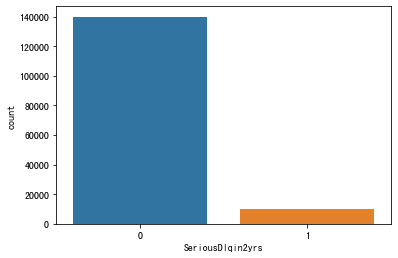

In [50]:
###EDA ####
import seaborn as sns
## SeriousDlqin2yrs INFO ##
print(df_train['SeriousDlqin2yrs'].value_counts())
sns.countplot(x='SeriousDlqin2yrs',data=df_train)
10026/(139974+10026)
# print('违约比例'，10026/(139974+10026))

In [51]:
#缺失值情况统计#
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

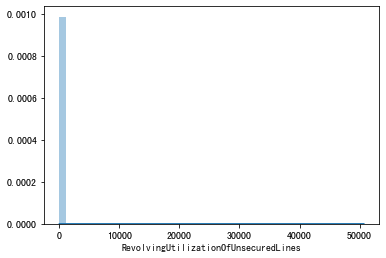

In [52]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [53]:
#缺失值对中位数进行填充
print(df_train.median())
df_train=df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64


SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [54]:
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# 数据分箱


In [55]:
# age 分成6段
import math
age_bins= [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age']=pd.cut(df_train['age'],bins=age_bins)
df_train[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


In [56]:
# 对于NumberOfDependents 分成6段
dependent_bins= [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents']=pd.cut(df_train['NumberOfDependents'],bins=dependent_bins)
df_train[['NumberOfDependents','bin_NumberOfDependents']]

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


In [57]:
#对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段
dpd_bins= [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse']=pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate']=pd.cut(df_train['NumberOfTimes90DaysLate'],bins=dpd_bins)

print(df_train[['NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate']])


        NumberOfTime30-59DaysPastDueNotWorse  \
0                                          2   
1                                          0   
2                                          1   
3                                          0   
4                                          1   
...                                      ...   
149995                                     0   
149996                                     0   
149997                                     0   
149998                                     0   
149999                                     0   

       bin_NumberOfTime30-59DaysPastDueNotWorse  \
0                                    (1.0, 2.0]   
1                                   (-inf, 1.0]   
2                                   (-inf, 1.0]   
3                                   (-inf, 1.0]   
4                                   (-inf, 1.0]   
...                                         ...   
149995                              (-inf, 1.0]   
149996         

In [59]:
#对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train['bin_RevolvingUtilizationOfUnsecuredLines']=pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio']=pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome']=pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans']=pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
df_train['bin_NumberRealEstateLoansOrLines']=pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop')

df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-0.001, 1.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(-0.001, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-0.001, 1.0]"


In [60]:
#统计分箱字段
bin_cols=[c for c in df_train.columns.values if c.startswith('bin_') ]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [39]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(9083.0, 3008750.0]","(12.0, 58.0]","(2.0, 54.0]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3000.0]","(-0.001, 4.0]","(-0.001, 1.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(3000.0, 4544.2]","(-0.001, 4.0]","(-0.001, 1.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(3000.0, 4544.2]","(4.0, 6.0]","(-0.001, 1.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(9083.0, 3008750.0]","(6.0, 9.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3000.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(4544.2, 6300.0]","(-0.001, 4.0]","(-0.001, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]",NaN,"(12.0, 58.0]","(-0.001, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(4544.2, 6300.0]","(-0.001, 4.0]","(-0.001, 1.0]"


In [61]:
###计算IV 衡量变量预测能力
import numpy as np
def cal_IV(df,feature,target):
    lst=[]
    cols=['Variable','Value','All','Bad']
    ##对 feature 每个bin 进行遍历
    for i in range(df[feature].nunique()):
        val=list(df[feature].unique())[i]
        lst.append([feature,val,df[df[feature]==val].count()[feature],df[(df[feature]==val)&(df[target]==1)].count()[feature]])
#     print(lst)
    data=pd.DataFrame(lst,columns=cols)
    data=data[data['Bad']>0]
    data['Share']=data['All']/data['All'].sum()
    data['Bad Rate']=data['Bad']/data['All'].sum()
    data['Margin Bad']=data['Bad']/data['Bad'].sum()
    data['Margin Good']=(data['All']-data['Bad'])/(data['All'].sum()-data['Bad'].sum())
    data['woe']=np.log(data['Margin Bad']/data['Margin Good'])
    data['iv']=(data['woe']*(data['Margin Bad']-data['Margin Good'])).sum()
    data=data.sort_values(by=['Variable','Value'])
#     print(data)
    return data['iv'].values[0]
cal_IV(df_train,'bin_age','SeriousDlqin2yrs')    

0.24041120302785982

In [62]:
###print the bin_cols iv value
for f in bin_cols:
    print(f,cal_IV(df_train,f,'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.0120914141106244


## select the iv value that greater than 0.1
bin_NumberOfTime30-59DaysPastDueNotWorse
bin_NumberOfTime60-89DaysPastDueNotWorse
bin_NumberOfTimes90DaysLate
bin_RevolvingUtilizationOfUnsecuredLines
bin_age 

In [63]:
feature_cols=['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate','bin_RevolvingUtilizationOfUnsecuredLines','bin_age']

In [64]:
## CALCULATE THE WOE VALUE FOR fEATURE
def call_WOE(df,features,target):
    df_new=df.copy()
    for f in features:
        df_woe=df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns=list(map(''.join,df_woe.columns.values))
        df_woe=df_woe.reset_index()
        df_woe=df_woe.rename(columns={target+'sum':'bad',target+'count':'all'})
        df_woe['good']=df_woe['all']-df_woe['bad']
        df_woe['margin bad']=df_woe['bad']/df_woe['bad'].sum()
        df_woe['margin good']=df_woe['good']/df_woe['good'].sum()
        df_woe['woe']=np.log1p(df_woe['margin bad']/df_woe['margin good'])
        df_woe.columns=[c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new=df_new.merge(df_woe,on=f,how='left')
#         print(df_woe)
    return df_new
df_woe= call_WOE(df_train,bin_cols,'SeriousDlqin2yrs')       

In [46]:
df_woe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 81 columns):
 #   Column                                                Non-Null Count   Dtype   
---  ------                                                --------------   -----   
 0   SeriousDlqin2yrs                                      150000 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines                  150000 non-null  float64 
 2   age                                                   150000 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse                  150000 non-null  int64   
 4   DebtRatio                                             150000 non-null  float64 
 5   MonthlyIncome                                         150000 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans                       150000 non-null  int64   
 7   NumberOfTimes90DaysLate                               150000 non-null  int64   
 8   NumberRealEstateLoansOrLines      

In [65]:
feature_cols=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','RevolvingUtilizationOfUnsecuredLines','age']

In [77]:
feature_cols

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

In [66]:
##get the woe rules
df_bin_to_woe=pd.DataFrame(columns=['features','bin','woe'])
for f in feature_cols:
    b='bin_'+f
    w='woe_bin_'+f
    df=df_woe[[w,b]].drop_duplicates()
    df.columns=['woe','bin']
    df['features']=f
    df_bin_to_woe=pd.concat([df_bin_to_woe,df])  
df_bin_to_woe    

,features,bin,woe
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111
191,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",2.520613
251,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",2.774776
423,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",2.902860
1052,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",2.812612
6909,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",2.024184
10822,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",2.077007


# 逻辑回归建模

In [67]:
woe_cols=[c for c in list(df_woe.columns.values) if 'woe'in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [78]:
woe_cols=['woe_bin_'+ c for c in feature_cols]
woe_cols

['woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_age']

In [79]:
df_woe[woe_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   woe_bin_NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 1   woe_bin_NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 2   woe_bin_NumberOfTimes90DaysLate               150000 non-null  float64
 3   woe_bin_RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 4   woe_bin_age                                   150000 non-null  float64
dtypes: float64(5)
memory usage: 6.9 MB


In [80]:
##数据集切分
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2,random_state=33)

In [81]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=33).fit(x_train,y_train)
y_pred=model.predict(x_val)
print(accuracy_score(y_pred,y_val))
print(roc_auc_score(y_pred,y_val))

0.9364333333333333
0.7787691092695656


In [82]:


print(model.coef_[0])

[0.87540308 0.45306013 0.72714541 1.4410486  1.10219085]


In [89]:
###generate the credit card model
A,B=650,72.13
def generate_scorecard(model_coef,binning_df,features,B):
    lst=[]
    cols=['Variable','Binning','Score']
    coef=model_coef[0]
#     print(coef)
    for i in range(len(features)):
        f=features[i]
#         print(f)
        df=binning_df[binning_df['features']==f]
#         print(df)
        for index,row in df.iterrows():
            score=int(round(-coef[i]*row['woe']*B))
            lst.append([f,row['bin'],score])
    data=pd.DataFrame(lst,columns=cols)   
    return data
    
score_card=generate_scorecard(model.coef_,df_bin_to_woe,feature_cols,B) 
score_card

,Variable,Binning,Score
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-114
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-36
2,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-136
3,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-153
4,NumberOfTime30-59DaysPastDueNotWorse,"(4.0, 5.0]",-159
5,NumberOfTime30-59DaysPastDueNotWorse,"(6.0, 7.0]",-175
6,NumberOfTime30-59DaysPastDueNotWorse,"(9.0, inf]",-183
7,NumberOfTime30-59DaysPastDueNotWorse,"(5.0, 6.0]",-178
8,NumberOfTime30-59DaysPastDueNotWorse,"(7.0, 8.0]",-128
9,NumberOfTime30-59DaysPastDueNotWorse,"(8.0, 9.0]",-131


In [90]:
##sorted by field and look up the rules
sort_scorecard=score_card.groupby('Variable').apply(lambda x:x.sort_values('Score',ascending=False))

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 1   NumberOfTime30-59DaysPastDueNotWorse   
                                     0   NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     2   NumberOfTime30-59DaysPastDueNotWorse   
                                     3   NumberOfTime30-59DaysPastDueNotWorse   
                                     4   NumberOfTime30-59DaysPastDueNotWorse   
                                     5   NumberOfTime30-59DaysPastDueNotWorse   
                                     7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 19  NumberOfTime60-89DaysPastDueNotWorse   
                                     10  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     11  NumberOfTime60-89DaysPastDueNotWorse   
                                     14  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     13  NumberOfTime60-89DaysPastDueNotWorse   
                                     12  NumberOfTime60-89DaysPastDueNotWorse   
                                     15  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              20               NumberOfTimes90DaysLate   
                                     22               NumberOfTimes90DaysLate   
                                     25               NumberOfTimes90DaysLate   
                                     21               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     23               NumberOfTimes90DaysLate   
                                     24               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 34  RevolvingUtilizationOfUnsecuredLines   
                                     33  RevolvingUtilizationOfUnsecuredLines   
                                     32  RevolvingUtilizationOfUnsecuredLines   
                                     31  RevolvingUtilizationOfUnsecuredLines   
                                     30  RevolvingUtilizationOfUnsecuredLines   
age                                  37                                   age   
                                     39                                   age   
                                     38                                   age   
                                     35                                   age   
                                     36                                   age   
                                     40                                   age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 1        (-inf, 1.0]    -36  
                                     0         (1.0, 2.0]   -114  
                                     8         (7.0, 8.0]   -128  
                                     9         (8.0, 9.0]   -131  
                                     2         (2.0, 3.0]   -136  
                                     3         (3.0, 4.0]   -153  
                                     4         (4

In [99]:
def str_to_int(s):
    if s=='-inf':
        return -999999
    if s=='inf':
        return 999999
    return float(s)
##将Value 映射到bin
def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins=str(row['Binning'])
        left_open=bins[0]=='('
        right_open=bins[-1]==')'
        binnings=bins[1:-1].split(',')
        in_range=True
        if left_open:
            if feature_value<=str_to_int(binnings[0]):
                in_range=False
        else:
             if feature_value<str_to_int(binnings[0]):
                in_range=False   
        if right_open:
            if feature_value>=str_to_int(binnings[1]):
                in_range=False
        else:
             if feature_value>str_to_int(binnings[1]):
                in_range=False  
        if in_range: 
            return row['Binning']
    return null
                
def map_to_score(df,score_card):
    scored_columns=list(score_card['Variable'].unique())
    score=0
    for col in scored_columns:
        feature_to_bin=score_card[score_card['Variable']==col]
        feature_value=df[col]
        selected_bin=map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard=feature_to_bin[feature_to_bin['Binning']==selected_bin]
        score=score+selected_record_in_scorecard['Score'].iloc[0]
    return score   

def calculate_score_with_card(df,score_card,A):
    df['score']=df.apply(map_to_score,args=(score_card,),axis=1)
    df['score']+=A
    df['score']=df['score'].astype(int)
    return df


In [100]:
###random pick 5 good sample
good_sample=df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
good_sample=good_sample[feature_cols]

calculate_score_with_card(good_sample,score_card,A)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,score
72270,0,0,0,0.399647,55,434
6613,0,0,0,0.429472,54,434
25990,0,0,0,0.005034,88,514
94315,0,0,0,0.014222,82,514
45380,0,0,0,0.108775,37,449


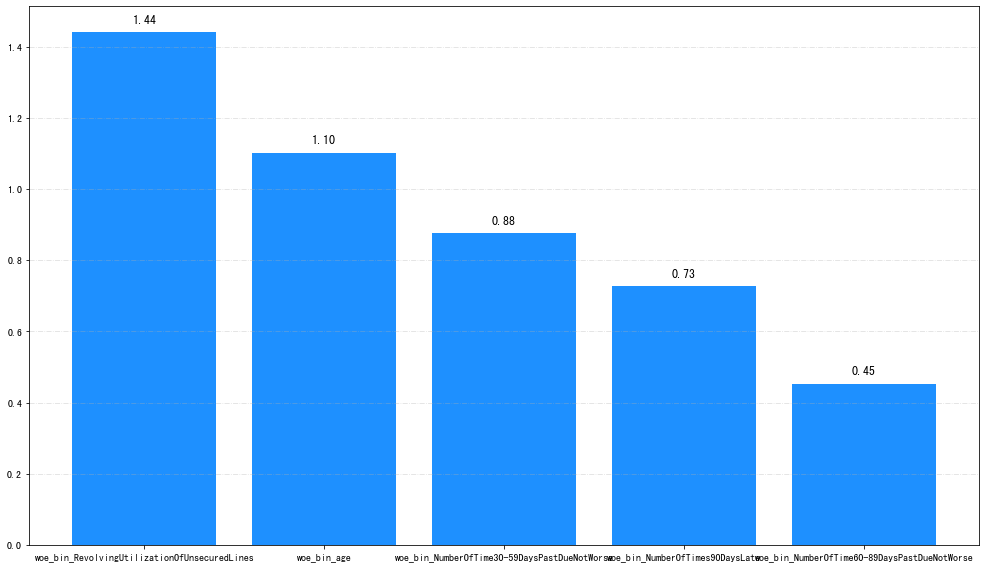

In [104]:
###################################################################变量的可解释说明############################################

import matplotlib.pyplot as plt
coef_lr = pd.DataFrame({'var' : x_val.columns,
                        'coef' : model.coef_.flatten()
                        })

index_sort =  np.abs(coef_lr['coef']).sort_values(ascending = False).index
coef_lr_sort = coef_lr.loc[index_sort,:]

# 变量重要性柱形图
plt.figure(figsize=(14,8))
x, y = coef_lr_sort['var'], coef_lr_sort['coef']
rects = plt.bar(x, y, color='dodgerblue')
plt.grid(linestyle="-.", axis='y', alpha=0.4)
plt.tight_layout()
y1 = y[ y > 0];x1 = x[y1.index]
for a,b in zip(x1,y1):
    plt.text(a ,b+0.02,'%.2f' %b, ha='center',va='bottom',fontsize=12)
y2 = y[ y < 0];x2 = x[y2.index]
for a,b in zip(x2,y2):
    plt.text(a ,b-0.02,'%.2f' %b, ha='center',va='bottom',fontsize=12)

五个变量都和预测变量呈正相关关系
woe_bin_RevolvingUtilizationOfUnsecuredLines 变量变化1个单位，ln（预测变量）增加1.44 个单位
woe_bin_age 变量变化1个单位，ln（预测变量）增加1.1 个单位
woe_bin_NumberOfTime30-59DaysPastDueNotWors 变量变化1个单位，ln（预测变量）增加0.88 个单位
woe_bin_NumberOfTimes90DaysLate 变量变化1个单位，ln（预测变量）增加0.73 个单位
woe_bin_NumberOfTime60-89DaysPastDueNotWorse 变量变化1个单位，ln（预测变量）增加0.45 个单位

                         